In [86]:
# Importando API para o Script

import requests

def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

In [87]:
# Pegando todas as criptomoedas da API
api_url = "https://api.coincap.io/v2/assets"
params = {"sort": "marketCap"}  # Ordena por capitalização de mercado
data = get_data_from_api(api_url, params=params)

if data:
    for asset in data.get("data", []):
        print(f"{asset['rank']}. {asset['name']} ({asset['symbol']}): ${asset['priceUsd']}")


1. Bitcoin (BTC): $105591.5344136874565307
2. Ethereum (ETH): $3275.7679133746927165
3. XRP (XRP): $3.1199666666332616
4. Tether (USDT): $1.0004033727716055
5. Solana (SOL): $242.6134506631106136
6. BNB (BNB): $681.0831005414161107
7. USDC (USDC): $1.0000734703176136
8. Dogecoin (DOGE): $0.3347989444531442
9. Cardano (ADA): $0.9705642443533150
10. Lido Staked ETH (STETH): $3266.4085382396189634
11. TRON (TRX): $0.2517966209343101
12. Chainlink (LINK): $24.9014563643683537
13. Avalanche (AVAX): $34.4497399702736378
14. Wrapped Bitcoin (WBTC): $105289.7103876830526709
15. Stellar (XLM): $0.4376430659648475
16. Shiba Inu (SHIB): $0.0000188829101667
17. Sp8de (SPX): $1.3755628122890489
18. Litecoin (LTC): $130.3461450167927969
19. Polkadot (DOT): $6.1620264890585067
20. Bitcoin Cash (BCH): $437.0870536135597105
21. Uniswap (UNI): $12.1095185972296437
22. Trump Official (TRUMP): $27.5079449356184027
23. NEAR Protocol (NEAR): $4.6272032686369008
24. Multi Collateral DAI (DAI): $0.99940687921

In [88]:
def get_exchange_rate():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  # API pública para conversão de moedas
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data["rates"].get("BRL", 1)  # Retorna a taxa de câmbio para BRL (se falhar, retorna 1)
    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter taxa de câmbio: {e}")
        return 1  # Se houver erro, mantemos o valor original em USD


### Volume e Market Cap

In [89]:
def get_crypto_data():
    url = "https://api.coincap.io/v2/assets"
    params = {"sort": "marketCap"}
    exchange_rate = get_exchange_rate()  # Obtém a taxa de conversão USD -> BRL

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json().get("data", [])

        print("\n Criptomoedas (Valores Convertidos para BRL)\n")
        for asset in data:
            price_brl = float(asset["priceUsd"]) * exchange_rate
            market_cap_brl = float(asset["marketCapUsd"]) * exchange_rate
            volume_brl = float(asset["volumeUsd24Hr"]) * exchange_rate

            print(f"{asset['rank']}. {asset['name']} ({asset['symbol']}):")
            print(f"   Preço: R$ {price_brl:,.2f}")
            print(f"   Market Cap: R$ {market_cap_brl:,.2f}")
            print(f"   Volume 24h: R$ {volume_brl:,.2f}\n")

    except requests.exceptions.RequestException as e:
        print(f"Erro ao obter dados das criptomoedas: {e}")

# Executar a função
get_crypto_data()



 Criptomoedas (Valores Convertidos para BRL)

1. Bitcoin (BTC):
   Preço: R$ 618,766.39
   Market Cap: R$ 12,262,224,762,084.65
   Volume 24h: R$ 83,636,487,188.52

2. Ethereum (ETH):
   Preço: R$ 19,196.00
   Market Cap: R$ 2,313,431,068,714.03
   Volume 24h: R$ 47,170,902,743.59

3. XRP (XRP):
   Preço: R$ 18.28
   Market Cap: R$ 1,053,854,533,972.26
   Volume 24h: R$ 11,013,309,070.25

4. Tether (USDT):
   Preço: R$ 5.86
   Market Cap: R$ 817,247,265,703.55
   Volume 24h: R$ 164,665,761,698.23

5. Solana (SOL):
   Preço: R$ 1,421.71
   Market Cap: R$ 692,004,176,600.88
   Volume 24h: R$ 12,780,974,400.21

6. BNB (BNB):
   Preço: R$ 3,991.15
   Market Cap: R$ 574,752,423,094.67
   Volume 24h: R$ 1,393,060,838.24

7. USDC (USDC):
   Preço: R$ 5.86
   Market Cap: R$ 311,204,590,594.24
   Volume 24h: R$ 22,437,383,560.05

8. Dogecoin (DOGE):
   Preço: R$ 1.96
   Market Cap: R$ 290,050,239,291.06
   Volume 24h: R$ 4,642,414,116.92

9. Cardano (ADA):
   Preço: R$ 5.69
   Market Cap: R$ 2

### Histórico de Preço por Cripto


In [90]:
def get_crypto_history(crypto_id, interval="d1"):
    url = f"https://api.coincap.io/v2/assets/{crypto_id}/history"
    params = {"interval": interval}
    data = get_data_from_api(url, params)

    if data and "data" in data:
        print(f"Histórico de preços para {crypto_id}:")
        for entry in data["data"]:  # Mostra apenas os 5 primeiros registros
            print(f"Data: {entry['time']}, Preço: R$ {float(entry['priceUsd']) * 5.00:.2f}")
    else:
        print("Erro ao obter histórico de preços.")

crypto_history_to_analyze = input('Digite o id da Crypto que pretende analisar: ')
get_crypto_history(crypto_history_to_analyze)

Digite o id da Crypto que pretende analisar: eos
Histórico de preços para eos:
Data: 1706745600000, Preço: R$ 3.47
Data: 1706832000000, Preço: R$ 3.53
Data: 1706918400000, Preço: R$ 3.59
Data: 1707004800000, Preço: R$ 3.54
Data: 1707091200000, Preço: R$ 3.52
Data: 1707177600000, Preço: R$ 3.58
Data: 1707264000000, Preço: R$ 3.56
Data: 1707350400000, Preço: R$ 3.61
Data: 1707436800000, Preço: R$ 3.69
Data: 1707523200000, Preço: R$ 3.68
Data: 1707609600000, Preço: R$ 3.70
Data: 1707696000000, Preço: R$ 3.69
Data: 1707782400000, Preço: R$ 3.72
Data: 1707868800000, Preço: R$ 3.74
Data: 1707955200000, Preço: R$ 3.85
Data: 1708041600000, Preço: R$ 3.85
Data: 1708128000000, Preço: R$ 3.81
Data: 1708214400000, Preço: R$ 3.88
Data: 1708300800000, Preço: R$ 3.91
Data: 1708387200000, Preço: R$ 3.95
Data: 1708473600000, Preço: R$ 3.83
Data: 1708560000000, Preço: R$ 3.85
Data: 1708646400000, Preço: R$ 3.91
Data: 1708732800000, Preço: R$ 4.04
Data: 1708819200000, Preço: R$ 3.99
Data: 1708905600000, 

### Variação de Preço Últimas 24 horas

In [91]:
def get_crypto_changes():
    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        print("Variação de preço criptomoedas nas últimas 24h")
        for asset in data["data"]:
            print(f"{asset['rank']}. {asset['name']} ({asset['symbol']})")
            print(f"   Variação 24h: {float(asset.get('changePercent24Hr', 0)):.2f}%\n")
    else:
        print("Erro ao obter variação de preços.")
get_crypto_changes()

Variação de preço criptomoedas nas últimas 24h
1. Bitcoin (BTC)
   Variação 24h: 3.44%

2. Ethereum (ETH)
   Variação 24h: 5.93%

3. XRP (XRP)
   Variação 24h: 2.47%

4. Tether (USDT)
   Variação 24h: 0.03%

5. Solana (SOL)
   Variação 24h: 6.72%

6. BNB (BNB)
   Variação 24h: 2.63%

7. USDC (USDC)
   Variação 24h: 0.02%

8. Dogecoin (DOGE)
   Variação 24h: 3.19%

9. Cardano (ADA)
   Variação 24h: 5.25%

10. Lido Staked ETH (STETH)
   Variação 24h: 6.30%

11. TRON (TRX)
   Variação 24h: 5.79%

12. Chainlink (LINK)
   Variação 24h: 9.75%

13. Avalanche (AVAX)
   Variação 24h: 5.93%

14. Wrapped Bitcoin (WBTC)
   Variação 24h: 3.42%

15. Stellar (XLM)
   Variação 24h: 12.09%

16. Shiba Inu (SHIB)
   Variação 24h: 4.20%

17. Sp8de (SPX)
   Variação 24h: 28.20%

18. Litecoin (LTC)
   Variação 24h: 17.12%

19. Polkadot (DOT)
   Variação 24h: 9.59%

20. Bitcoin Cash (BCH)
   Variação 24h: 6.83%

21. Uniswap (UNI)
   Variação 24h: 4.48%

22. Trump Official (TRUMP)
   Variação 24h: 1.96%

23. 

### Gráfico Variação de Preço das 5 primeiras Criptomoedas

### Símbolos Criptomoedas

In [93]:
def get_crypto_symbols():
    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        print("Siglas das criptomoedas:")
        for asset in data["data"]:
            print(f"{asset['name']} ({asset['symbol']})")
    else:
        print("Erro ao obter siglas das criptomoedas.")

# Exemplo de chamada
get_crypto_symbols()


Siglas das criptomoedas:
Bitcoin (BTC)
Ethereum (ETH)
XRP (XRP)
Tether (USDT)
Solana (SOL)
BNB (BNB)
USDC (USDC)
Dogecoin (DOGE)
Cardano (ADA)
Lido Staked ETH (STETH)
TRON (TRX)
Chainlink (LINK)
Avalanche (AVAX)
Wrapped Bitcoin (WBTC)
Stellar (XLM)
Shiba Inu (SHIB)
Sp8de (SPX)
Litecoin (LTC)
Polkadot (DOT)
Bitcoin Cash (BCH)
Uniswap (UNI)
Trump Official (TRUMP)
NEAR Protocol (NEAR)
Multi Collateral DAI (DAI)
Aave (AAVE)
Hedera Hashgraph (HBAR)
Internet Computer (ICP)
Monero (XMR)
Ethereum Classic (ETC)
VeChain (VET)
OKB (OKB)
Crypto.com Coin (CRO)
Algorand (ALGO)
Filecoin (FIL)
MANTRA DAO (OM)
Artificial Superintelligence Alliance (FET)
Raydium (RAY)
GateToken (GT)
Stacks (STX)
THETA (THETA)
Lido DAO (LDO)
The Graph (GRT)
KuCoin Token (KCS)
DeXe (DEXE)
Cosmos (ATOM)
Fantom (FTM)
Injective (INJ)
XinFin Network (XDC)
The Sandbox (SAND)
Quant (QNT)
EOS (EOS)
Gala (GALA)
Tezos (XTZ)
IOTA (IOTA)
Curve DAO Token (CRV)
Flow (FLOW)
Maker (MKR)
Neo (NEO)
Bitcoin SV (BSV)
Arweave (AR)
Nexo (NEXO

### Análise de Mercado por Criptomoeda

In [94]:
import requests

def get_market_data(base_symbol=None, quote_symbol=None, limit=5):
    url = "https://api.coincap.io/v2/markets"
    params = {
        "baseSymbol": base_symbol,
        "quoteSymbol": quote_symbol,
        "limit": limit
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        if data["data"]:
            for market in data["data"]:
                print(f"Exchange: {market['exchangeId']}")
                print(f"Simbolo: {market['baseSymbol']}, Quote Symbol: {market['quoteSymbol']}")
                print(f"Preço (USD): {market['priceUsd']}")
                print(f"Volume (USD 24hr): {market['volumeUsd24Hr']}")
                print(f"Trades Count (24hr): {market['tradesCount24Hr']}")
                print("-" * 50)
        else:
            print("Nenhum mercado encontrado.")
    else:
        print(f"Erro ao consumir a API: {response.status_code}")

# Exemplo de uso

crypto_market_data = input('Digite o Símbolo da Criptomoeda que pretende analisar: ')

get_market_data(base_symbol=crypto_market_data, quote_symbol="USD", limit=5)


Digite o Símbolo da Criptomoeda que pretende analisar: ETH
Exchange: bitfinex
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3280.2000000000000000
Volume (USD 24hr): 7589034.9016264860000000
Trades Count (24hr): None
--------------------------------------------------
Exchange: bitso
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3277.1000000000000000
Volume (USD 24hr): 528912.8188006690000000
Trades Count (24hr): 1035
--------------------------------------------------
Exchange: bitstamp
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3277.2000000000000000
Volume (USD 24hr): 17444633.0362356600000000
Trades Count (24hr): None
--------------------------------------------------
Exchange: cex
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3166.9500000000000000
Volume (USD 24hr): 47990.1203020500000000
Trades Count (24hr): 7
--------------------------------------------------
Exchange: exmo
Simbolo: ETH, Quote Symbol: USD
Preço (USD): 3253.8523000000000000
Volume (USD 24hr): 16347.1581058300630000
Tr

In [95]:
import requests

def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

def list_cryptocurrencies():
    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        print("Detalhes das criptomoedas:")
        for asset in data["data"]:
            print(f"ID: {asset['id']}")
            print(f"Nome: {asset['name']}")
            print(f"Símbolo: {asset['symbol']}")
            print(f"Preço USD: {float(asset['priceUsd']):.2f}")
            print(f"Volume (24h): {float(asset['volumeUsd24Hr']):.2f}")
            print("-" * 40)
    else:
        print("Erro ao obter dados das criptomoedas.")

# Exemplo de uso
list_cryptocurrencies()


Detalhes das criptomoedas:
ID: bitcoin
Nome: Bitcoin
Símbolo: BTC
Preço USD: 105543.72
Volume (24h): 14273694042.39
----------------------------------------
ID: ethereum
Nome: Ethereum
Símbolo: ETH
Preço USD: 3276.28
Volume (24h): 8052305495.61
----------------------------------------
ID: xrp
Nome: XRP
Símbolo: XRP
Preço USD: 3.12
Volume (24h): 1879669395.87
----------------------------------------
ID: tether
Nome: Tether
Símbolo: USDT
Preço USD: 1.00
Volume (24h): 28104566376.08
----------------------------------------
ID: solana
Nome: Solana
Símbolo: SOL
Preço USD: 242.61
Volume (24h): 2181017925.55
----------------------------------------
ID: binance-coin
Nome: BNB
Símbolo: BNB
Preço USD: 681.04
Volume (24h): 237660287.06
----------------------------------------
ID: usd-coin
Nome: USDC
Símbolo: USDC
Preço USD: 1.00
Volume (24h): 3832302829.82
----------------------------------------
ID: dogecoin
Nome: Dogecoin
Símbolo: DOGE
Preço USD: 0.33
Volume (24h): 792791072.53
----------------

# Dados de Mercado

In [97]:
import requests
import pandas as pd

# Função para obter dados da API de mercados (exchanges)
def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

# Função para garantir que os valores sejam válidos para conversão para float
def safe_float(value):
    try:
        return round(float(value), 2) if value else 0.0
    except (ValueError, TypeError):
        return 0.0

# Função para listar dados de mercado (exchanges)
def list_market_data():
    url = "https://api.coincap.io/v2/exchanges"
    data = get_data_from_api(url)

    if data and "data" in data:
        market_data = []

        for exchange in data["data"]:
            volume_usd = exchange.get('volumeUsd', '0')  # Se não encontrar, usar '0'
            percent_volume = exchange.get('percentTotalVolume', '0')  # Se não encontrar, usar '0'
            trading_pairs = exchange.get('tradingPairs', '0')  # Se não encontrar, usar '0'

            market_data.append({
                "Exchange": exchange.get('name', 'Desconhecido'),
                "ID da Exchange": exchange.get('exchangeId', 'Desconhecido'),
                "Volume Total (USD)": safe_float(volume_usd),  # Usar safe_float para garantir que o valor seja válido
                "Volume Percentual": safe_float(percent_volume),  # Usar safe_float para garantir que o valor seja válido
                "Pares de Negociação": trading_pairs,
                "URL da Exchange": exchange.get('exchangeUrl', 'Desconhecido'),
            })

        # Criar o DataFrame de mercados
        df_market = pd.DataFrame(market_data)
        return df_market
    else:
        return "Erro ao obter dados de mercados."

# Função para salvar DataFrame em Excel
def save_to_excel(df, filename="dados_mercado.xlsx"):
    df.to_excel(filename, index=False)  # Salvar o DataFrame em um arquivo Excel
    print(f"Arquivo {filename} salvo com sucesso.")

# Exemplo de uso
df_market = list_market_data()
if isinstance(df_market, pd.DataFrame):
    save_to_excel(df_market, "dados_mercado.xlsx")  # Salvar os dados de mercados


Arquivo dados_mercado.xlsx salvo com sucesso.


# Dados de Criptomoedas


In [98]:
import requests
import pandas as pd

# Função para obter dados da API
def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

# Função para obter a taxa de câmbio USD para BRL usando uma API gratuita
def get_usd_to_brl():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  # API pública gratuita
    data = get_data_from_api(url)
    if data and "rates" in data:
        return data["rates"].get("BRL", None)  # Pegando a taxa de USD para BRL
    else:
        print("Erro ao obter a taxa de câmbio USD para BRL.")
        return None

# Função para listar as criptomoedas e criar tabela
def list_cryptocurrencies_table():
    # Obter taxa de câmbio USD para BRL
    usd_to_brl = get_usd_to_brl()
    if usd_to_brl is None:
        return "Erro ao obter a taxa de câmbio USD/BRL"

    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        # Criar lista de dados para a tabela
        crypto_data = [
            {
                "ID": asset['id'],
                "Nome": asset['name'],
                "Símbolo": asset['symbol'],
                "Preço BRL": round(float(asset['priceUsd']) * usd_to_brl, 2),  # Arredondar preço para 2 casas decimais
                "Volume 24h": round(float(asset['volumeUsd24Hr']), 2),  # Arredondar volume para 2 casas decimais
                "Variação 24h (%)": round(float(asset.get('changePercent24Hr', 0)), 2)  # Arredondar variação para 2 casas decimais
            }
            for asset in data["data"]
        ]

        # Criar o DataFrame
        df = pd.DataFrame(crypto_data)

        # Calcular a variação em BRL considerando o preço anterior e o percentual de variação
        df['Variação 24h em BRL'] = df.apply(
            lambda row: round(row['Preço BRL'] * (1 + row['Variação 24h (%)'] / 100) - row['Preço BRL'], 2), axis=1)

        return df
    else:
        return "Erro ao obter dados das criptomoedas."

# Função para salvar o DataFrame em um arquivo Excel
def save_to_excel(df, filename="dados_criptomoedas.xlsx"):
    df.to_excel(filename, index=False)  # Salvar o DataFrame em um arquivo Excel
    print(f"Arquivo '{filename}' salvo com sucesso.")

# Exemplo de uso
df_cryptos = list_cryptocurrencies_table()
if isinstance(df_cryptos, pd.DataFrame):
    save_to_excel(df_cryptos)  # Salvar o DataFrame em um arquivo Excel
else:
    print(df_cryptos)  # Mostrar mensagem de erro



Arquivo 'dados_criptomoedas.xlsx' salvo com sucesso.


### Variação de Porcentagem nas Criptos nas últimas 24 horas // Top 10

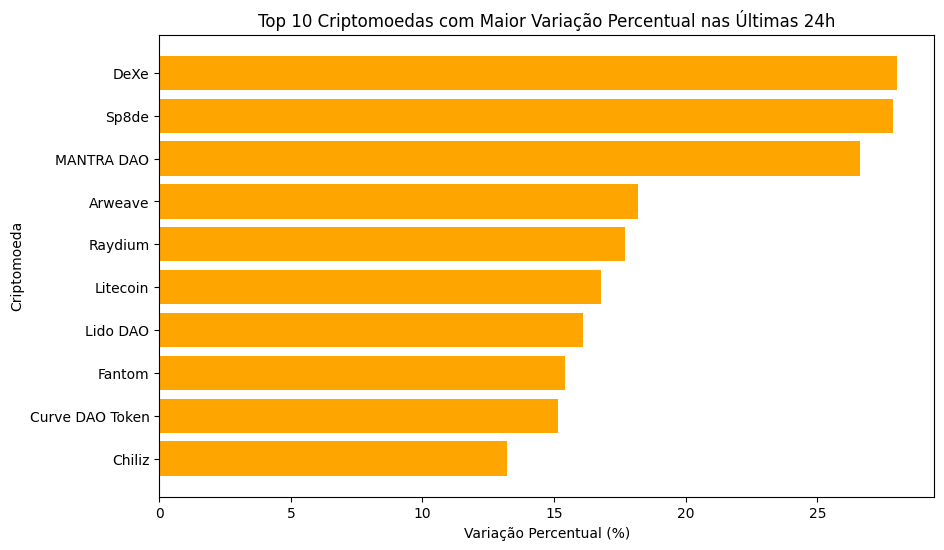

In [103]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Função para obter dados da API
def get_data_from_api(url, params=None):
    headers = {"User-Agent": "Mozilla/5.0"}  # Cabeçalho para compatibilidade
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Lança uma exceção se houver um erro HTTP
        return response.json()  # Retorna os dados em formato JSON
    except requests.exceptions.RequestException as e:
        print(f"Erro ao consumir a API: {e}")
        return None

# Função para obter a taxa de câmbio USD para BRL usando uma API gratuita
def get_usd_to_brl():
    url = "https://api.exchangerate-api.com/v4/latest/USD"  # API pública gratuita
    data = get_data_from_api(url)
    if data and "rates" in data:
        return data["rates"].get("BRL", None)  # Pegando a taxa de USD para BRL
    else:
        print("Erro ao obter a taxa de câmbio USD para BRL.")
        return None

# Função para listar as criptomoedas e criar tabela
def list_cryptocurrencies_table():
    # Obter taxa de câmbio USD para BRL
    usd_to_brl = get_usd_to_brl()
    if usd_to_brl is None:
        return "Erro ao obter a taxa de câmbio USD/BRL"

    url = "https://api.coincap.io/v2/assets"
    data = get_data_from_api(url)

    if data and "data" in data:
        # Criar lista de dados para a tabela
        crypto_data = [
            {
                "ID": asset['id'],
                "Nome": asset['name'],
                "Símbolo": asset['symbol'],
                "Preço BRL": round(float(asset['priceUsd']) * usd_to_brl, 2),  # Preço em BRL
                "Variação 24h (%)": round(float(asset.get('changePercent24Hr', 0)), 2)  # Variação em porcentagem
            }
            for asset in data["data"]
        ]

        # Criar o DataFrame
        df = pd.DataFrame(crypto_data)

        return df
    else:
        return "Erro ao obter dados das criptomoedas."

# Função para gerar o gráfico de colunas
def plot_top_cryptos_by_variation(df):
    # Ordenar pelo valor absoluto da variação percentual (em ordem decrescente)
    top_cryptos = df[['Nome', 'Variação 24h (%)']].sort_values(by='Variação 24h (%)', ascending=False).head(10)

    # Gerar o gráfico de colunas
    plt.figure(figsize=(10, 6))
    plt.barh(top_cryptos['Nome'], top_cryptos['Variação 24h (%)'], color='orange')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Criptomoeda')
    plt.title('Top 10 Criptomoedas com Maior Variação Percentual nas Últimas 24h')
    plt.gca().invert_yaxis()  # Inverter o eixo Y para mostrar a maior variação no topo
    plt.show()

# Exemplo de uso
df_cryptos = list_cryptocurrencies_table()
if isinstance(df_cryptos, pd.DataFrame):
    plot_top_cryptos_by_variation(df_cryptos)  # Gerar o gráfico com as 10 criptos mais variáveis
else:
    print(df_cryptos)  # Mostrar mensagem de erro
